ASSIGNMENT I
COMPUTING THE AREA OF THE MANDELBROT SET

1. Study the problem, implement the iteration and maybe create colourful pictures of the
fractal.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:


# 设置图像的尺寸和分辨率
width, height = 200, 200
max_iter = 200
# 定义Mandelbrot集合的判定函数
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# 创建一个图像，初始化为黑色
img = np.zeros((height, width))
time = 0
# 遍历图像上的每个像素
for i in range(width):
    for j in range(height):
        # 将像素坐标映射到复平面上的点
        c = complex((i / width) * 3 - 2, (j / height) * 3 - 1.5)
        
        # 判断点是否属于Mandelbrot集合
        m = mandelbrot(c, max_iter)
        time += m
        # 根据迭代次数给点上色（这里使用了一个简单的颜色映射）
        img[j, i] = 255 - int(m * 255 / max_iter)
        #img[j, i] = random_number = random.randint(0, 255)
print(time)


1493768


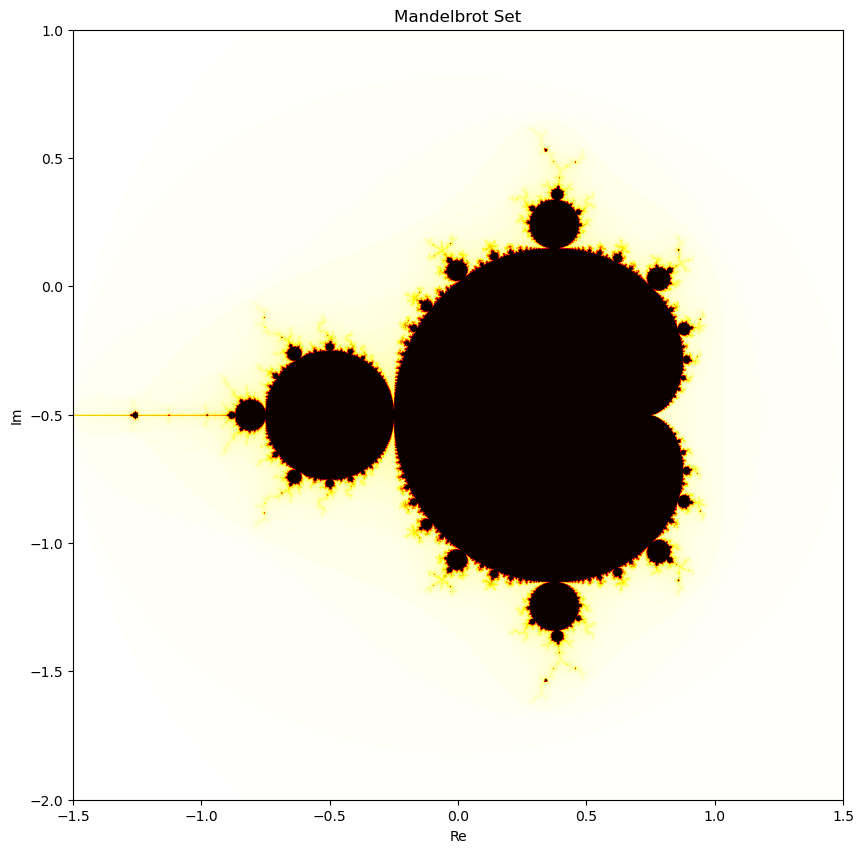

In [3]:
# 使用matplotlib显示结果
# Visualize with interpolation
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='hot', extent=(-1.5, 1.5, -2, 1))
plt.title('Mandelbrot Set')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


In [4]:
from scipy.interpolate import pchip_interpolate
from matplotlib.colors import LinearSegmentedColormap

def custom_colourmap():
    #set up the control points for your gradient
    yR_observed = [0, 0,32,237, 255, 0, 0, 32]
    yG_observed = [2, 7, 107, 255, 170, 2, 7, 107]
    yB_observed = [0, 100, 203, 255, 0, 0, 100, 203]

    x_observed = [-.1425, 0, .16, .42, .6425, .8575, 1, 1.16]

    #Create the arrays with the interpolated values
    x = np.linspace(min(x_observed), max(x_observed), num=1000)
    yR = pchip_interpolate(x_observed, yR_observed, x)
    yG = pchip_interpolate(x_observed, yG_observed, x)
    yB = pchip_interpolate(x_observed, yB_observed, x)

    #Convert them back to python lists
    x = list(x)
    yR = list(yR)
    yG = list(yG)
    yB = list(yB)

    #Find the indexs where x crosses 0 and crosses 1 for slicing
    start = 0
    end = 0
    for i in x:
        if i > 0:
            start = x.index(i)
            break

    for i in x:
        if i > 1:
            end = x.index(i)
            break

    #Slice away the helper data in the begining and end leaving just 0 to 1
    x = x[start:end]
    yR = yR[start:end]
    yG = yG[start:end]
    yB = yB[start:end]

    # Normalize the color values to the [0, 1] range
    yR = np.array(yR) / 255.0
    yG = np.array(yG) / 255.0
    yB = np.array(yB) / 255.0

    # Append 0 to the end of yR, yG, and yB
    yR = np.append(yR, 0.0)
    yG = np.append(yG, 0.0)
    yB = np.append(yB, 0.0)

    # Create a custom colormap from the interpolated color values
    colors = np.column_stack((yR, yG, yB))  # Combine R, G, and B values
    cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)
    
    return cmap


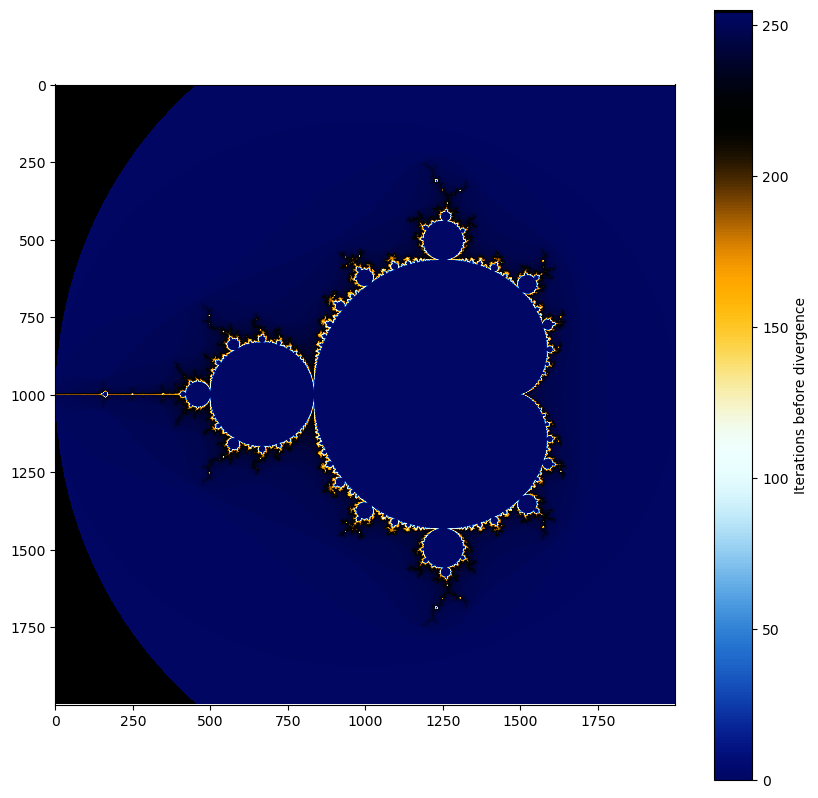

In [5]:
cmap = custom_colourmap()

# Create a figure and plot the data using the custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=cmap)
plt.colorbar().set_label('Iterations before divergence')
plt.show()

Problem 2

In [5]:
import numpy as np

start = 25000 # 500 * 500
end = 400000 # 2000 * 2000
interval = (end - start) / 10

# 使用列表推导来生成所需的值
s_values = [start + i * interval for i in range(11)]  # 包括终点所以是range(11)

# 设置范围
x_range = [-2, 1]
y_range = [-1.5, 1.5]
s = 800000
max_iter = 1000
def random_sampling(s, x_range = [-2, 1], y_range = [-1.5, 1.5]):
    # 随机生成50个点
    x_points = np.random.uniform(x_range[0], x_range[1], s)
    y_points = np.random.uniform(y_range[0], y_range[1], s)

    # 将点组合成坐标对
    points = np.column_stack((x_points, y_points))
    return points

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter




test1

In [2]:
area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
num_trials = 10
areas = []

# 进行十次计算
for _ in range(num_trials):
    points = random_sampling(s, x_range, y_range)
    in_mandelbrot = np.array([mandelbrot(complex(c[0], c[1]), max_iter) for c in points])
    proportion_in_set = np.sum(in_mandelbrot == max_iter) / s
    approx_area = proportion_in_set * area_of_sample
    areas.append(approx_area)

# 计算均值和方差
mean_area = np.mean(areas)
variance_area = np.var(areas)

# 打印结果
print(f"Mean area: {mean_area}")
print(f"Variance of area: {variance_area}")

# 绘制结果图表
trials = np.arange(1, num_trials + 1)
plt.plot(trials, areas, 'bo-', label='Approximate Areas')
plt.axhline(y=mean_area, color='r', linestyle='-', label='Mean Area')
plt.fill_between(trials, mean_area - np.sqrt(variance_area), mean_area + np.sqrt(variance_area), color='r', alpha=0.2, label='Variance Range')
plt.xlabel('Trial')
plt.ylabel('Approximated Area')
plt.title('Approximated Mandelbrot Set Area Across Trials')
plt.legend()
plt.show()

NameError: name 'x_range' is not defined

test2

Run 1 results:
Iteration 100: Approximated Area = 1.54386
Iteration 200: Approximated Area = 1.52496
Iteration 400: Approximated Area = 1.5156
Iteration 800: Approximated Area = 1.5107400000000002
Iteration 1500: Approximated Area = 1.50813
Iteration 2000: Approximated Area = 1.50759
Iteration 3000: Approximated Area = 1.50705
Iteration 4000: Approximated Area = 1.50705
Iteration 5000: Approximated Area = 1.50687
Iteration 6000: Approximated Area = 1.50669
Run 2 results:
Iteration 100: Approximated Area = 1.5250499999999998
Iteration 200: Approximated Area = 1.5057
Iteration 400: Approximated Area = 1.49526
Iteration 800: Approximated Area = 1.49103
Iteration 1500: Approximated Area = 1.48932
Iteration 2000: Approximated Area = 1.48851
Iteration 3000: Approximated Area = 1.48797
Iteration 4000: Approximated Area = 1.48797
Iteration 5000: Approximated Area = 1.4877
Iteration 6000: Approximated Area = 1.48743
Run 3 results:
Iteration 100: Approximated Area = 1.5561
Iteration 200: Approxi

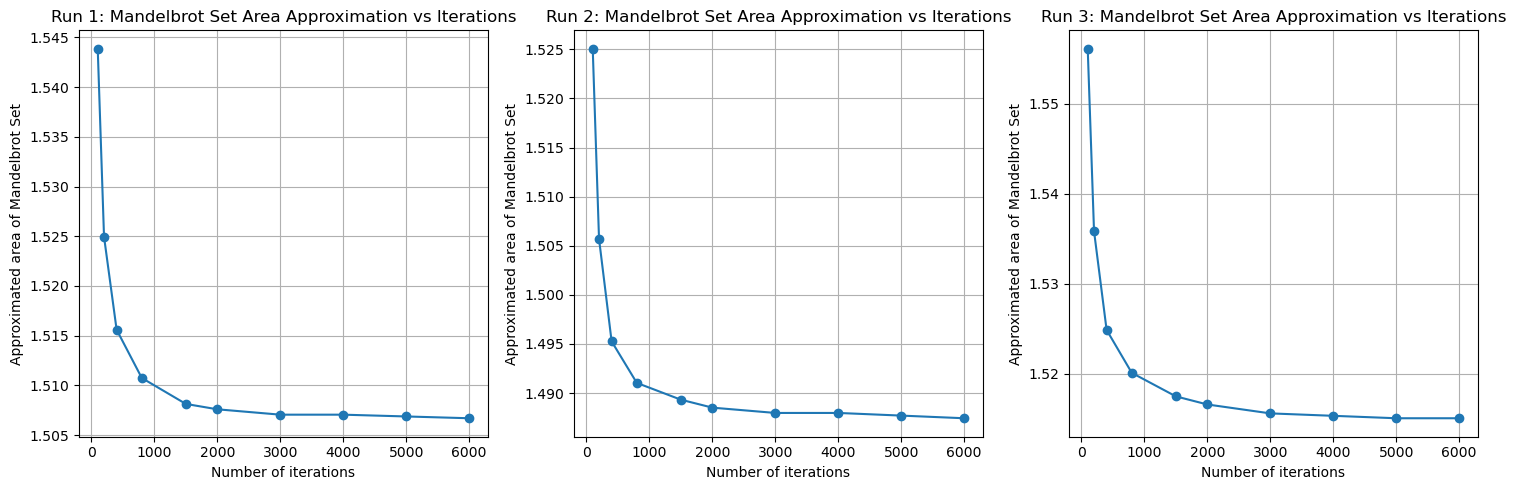

In [7]:
s = 100000  # 样本点的数量固定为100,000
iter_values = [100, 200, 400, 800, 1500, 2000, 3000, 4000, 5000]  # 迭代次数的不同值
area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
areas = []

fig, axs = plt.subplots(1, 3, figsize=(15, 5))



# 对于每个子图，运行计算并绘制结果
for i in range(3):
    areas = []  # 重置areas列表
    points = random_sampling(s, x_range, y_range)
    print(f"Run {i+1} results:")  # 输出当前的运行编号
    for max_iter in iter_values:
        in_mandelbrot = np.array([mandelbrot(complex(c[0], c[1]), max_iter) for c in points])
        proportion_in_set = np.sum(in_mandelbrot == max_iter) / s
        approx_area = proportion_in_set * area_of_sample
        areas.append(approx_area)
        print(f"Iteration {max_iter}: Approximated Area = {approx_area}")  # 打印迭代数和对应的近似面积


    # 在子图中绘制结果
    axs[i].plot(iter_values, areas, marker='o')
    axs[i].set_xlabel('Number of iterations')
    axs[i].set_ylabel('Approximated area of Mandelbrot Set')
    axs[i].set_title(f'Run {i+1}: Mandelbrot Set Area Approximation vs Iterations')
    axs[i].grid(True)

# 显示整个绘图窗口
plt.tight_layout()  # 调整子图布局，防止标签重叠
plt.show()

test2.1 focus on i

Run 1 results:
1.50498
Iteration 100: Approximated Area = 1.54467, Relative Error = 0.0263724434876211
Iteration 200: Approximated Area = 1.52379, Relative Error = 0.012498504963521105
Iteration 400: Approximated Area = 1.51416, Relative Error = 0.006099748833871524
Iteration 800: Approximated Area = 1.50876, Relative Error = 0.00251166128453542
Iteration 1500: Approximated Area = 1.50678, Relative Error = 0.0011960291831120838
Iteration 2000: Approximated Area = 1.50642, Relative Error = 0.000956823346489726
Iteration 3000: Approximated Area = 1.5057, Relative Error = 0.000478411673244863
Iteration 4000: Approximated Area = 1.5057, Relative Error = 0.000478411673244863
Iteration 5000: Approximated Area = 1.50543, Relative Error = 0.0002990072957780578
Run 2 results:
1.51263
Iteration 100: Approximated Area = 1.55187, Relative Error = 0.0259415719640627
Iteration 200: Approximated Area = 1.53243, Relative Error = 0.01308978401856372
Iteration 400: Approximated Area = 1.5219, Relative E

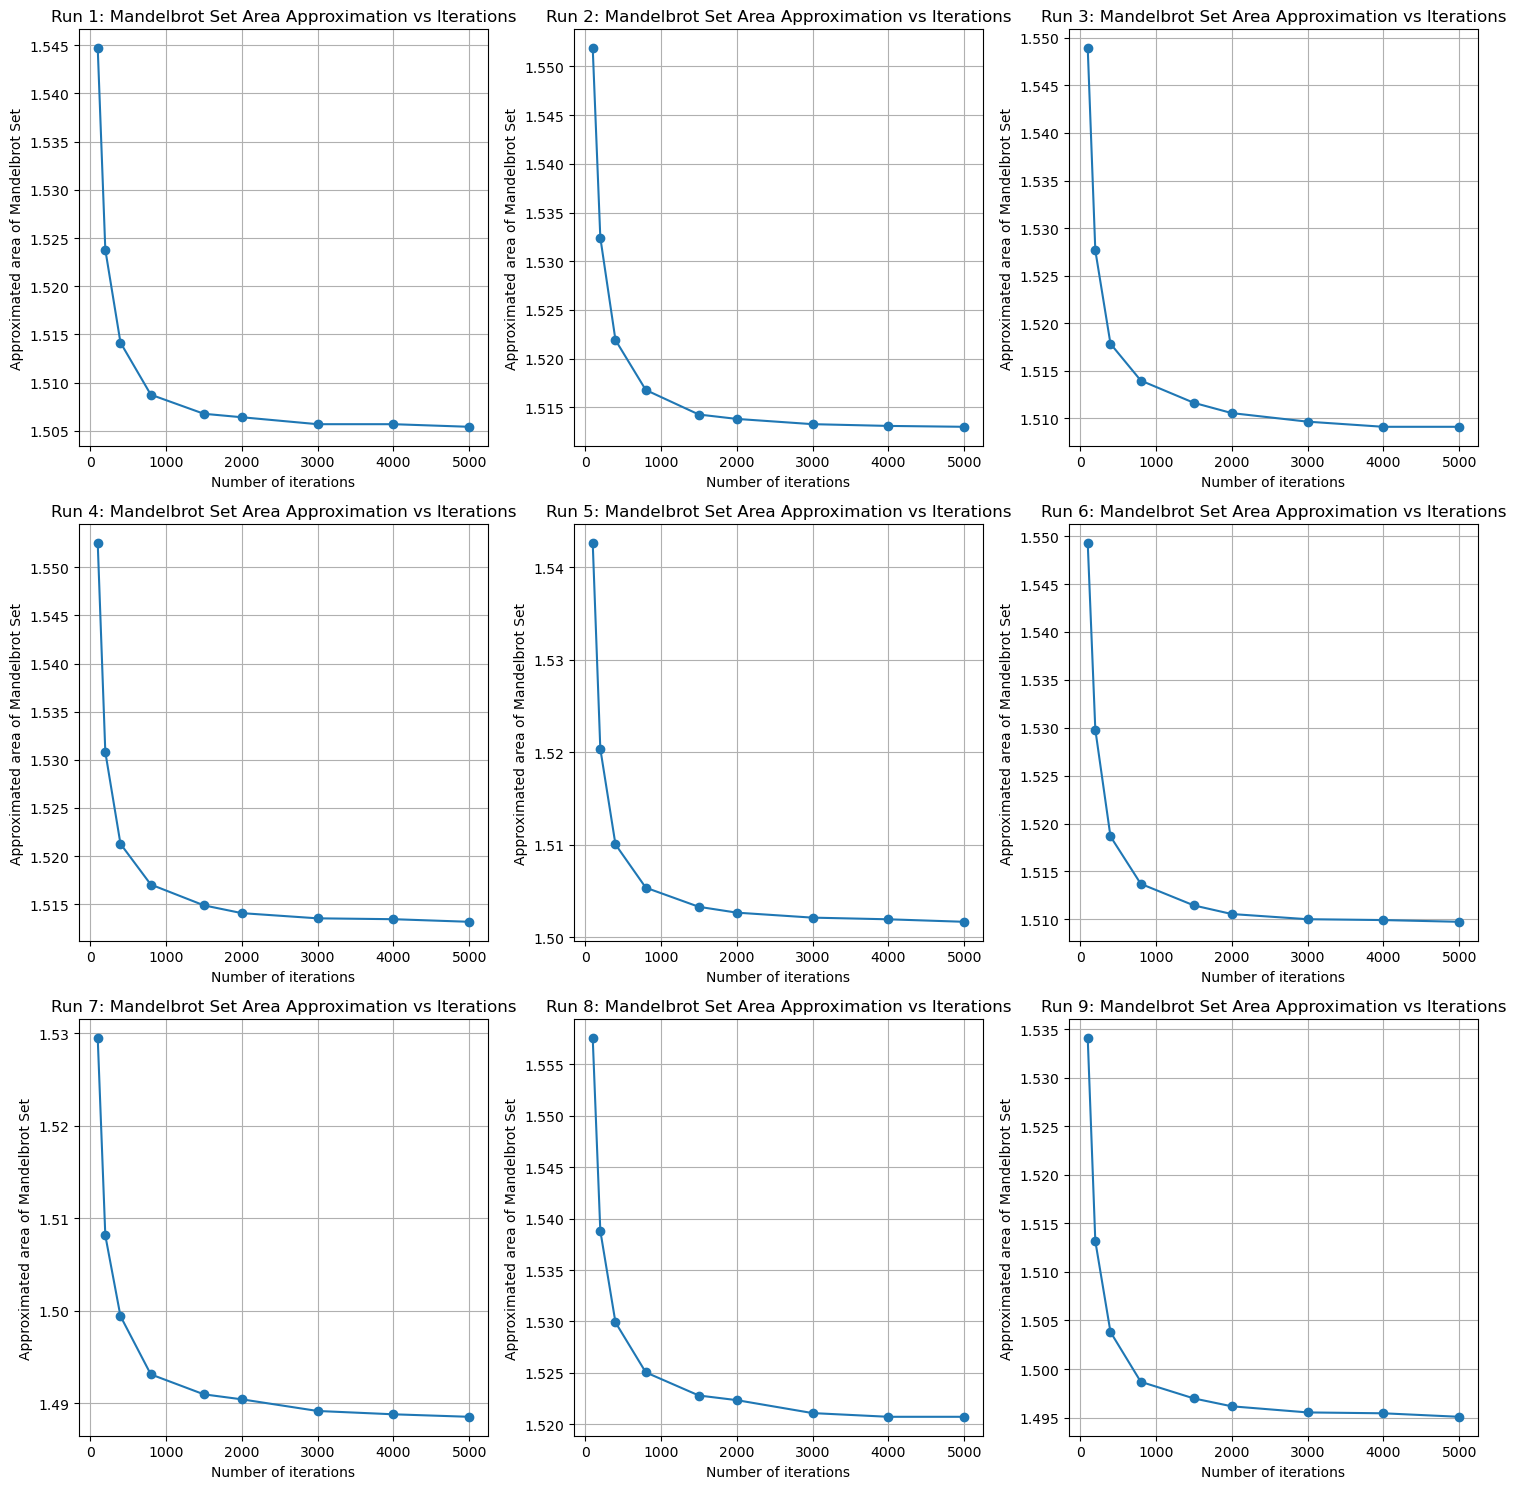

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ... 其他函数定义如 random_sampling 和 mandelbrot ...

s = 100000  # 样本点的数量固定为100000
iter_values = [100, 200, 400, 800, 1500, 2000, 3000, 4000, 5000]  # 迭代次数的不同值
x_range = [-2, 1]
y_range = [-1.5, 1.5]
area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 注意这里的figsize，每个子图都有足够的空间
t = 9 #进行几次循环


all_relative_errors = [[] for _ in iter_values]


# 对于每个子图，运行计算并绘制结果
for i in range(t):
    areas = []  # 重置areas列表
    relative_errors = []  # 用于存储相对误差
    
    reference_iter = 10000
    points = random_sampling(s, x_range, y_range)

    in_mandelbrot = np.array([mandelbrot(complex(c[0], c[1]), reference_iter) for c in points])
    proportion_in_set = np.sum(in_mandelbrot == reference_iter) / s
    reference_area = proportion_in_set * area_of_sample # 初始化参考面积
    
    
    print(f"Run {i+1} results:")  # 输出当前的运行编号
    print(reference_area)
    for j, max_iter in enumerate(iter_values):
        in_mandelbrot = np.array([mandelbrot(complex(c[0], c[1]), max_iter) for c in points])
        proportion_in_set = np.sum(in_mandelbrot == max_iter) / s
        new_approx_area = proportion_in_set * area_of_sample
        areas.append(new_approx_area)

        # 计算相对误差并存储
        
        relative_error = abs((new_approx_area - reference_area) / reference_area)
        relative_errors.append(relative_error)
        


        print(f"Iteration {max_iter}: Approximated Area = {new_approx_area}, Relative Error = {relative_errors[-1]}")
    
    for idx, rel_err in enumerate(relative_errors):  
        all_relative_errors[idx].append(rel_err)

    
    # 确定当前子图的行和列
    row = i // 3
    col = i % 3

    # 在子图中绘制结果
    axs[row, col].plot(iter_values, areas, marker='o')
    axs[row, col].set_xlabel('Number of iterations')
    axs[row, col].set_ylabel('Approximated area of Mandelbrot Set')
    axs[row, col].set_title(f'Run {i+1}: Mandelbrot Set Area Approximation vs Iterations')
    axs[row, col].grid(True)

# 显示整个绘图窗口
plt.tight_layout()  # 调整子图布局，防止标签重叠
plt.show()




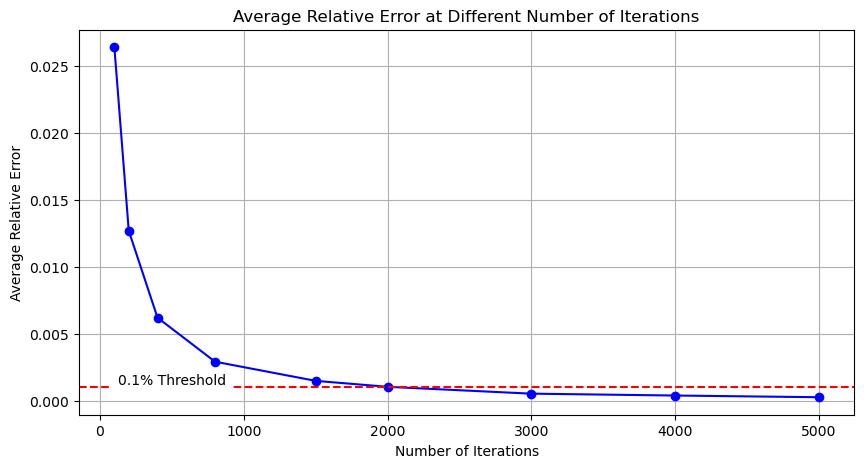

In [23]:
# 计算每个max_iter值的平均相对误差
average_relative_errors = [np.mean(errors) for errors in all_relative_errors]

# 绘制平均相对误差的折线图
plt.figure(figsize=(10, 5))  # 设置新图的大小
plt.plot(iter_values, average_relative_errors, marker='o', linestyle='-', color='blue')  # 画出平均相对误差的折线图

# 在误差为0.001处添加灰色虚线
plt.axhline(y=0.001, color='red', linestyle='--', label='Desired Threshold (0.1%)')
plt.text(len(relative_errors) * 0.5, 0.001, '0.1% Threshold', va='bottom', ha='center', backgroundcolor='white')

plt.xlabel('Number of Iterations')
plt.ylabel('Average Relative Error')
plt.title('Average Relative Error at Different Number of Iterations')
plt.grid(True)
plt.show()


我认为为了了解到iteration的变化对于估计精度的提升，我们应当保持样本点的位置一致，很显然增加max_iter会使得我们估计的面积变小（这样有更多的点有机会逃逸），我们在这个问题中实际上是为了找到i,s的变化对于估计精度效率的提升。我的计划是这样的我们首先取一个大的s,1000000。进行10次不同的取样（每次对于不同的i），找到效率最高的i(可以通过计算平均精度提升和耗时之间的比值作为参数)，之后对于这个效率最高的i我们使用不用的S进行测试，找到效率与s的关系。最终确定一组i,s。
My plan is this: We first take a large s, like 1,000,00.0 Carry out 10 different samplings (each time for a different i) and find the most efficient i (you can calculate the ratio between average accuracy improvement and time-consuming as a parameter). Then for this most efficient i we use different S Conduct a test to find the relationship between efficiency and s. Finally determine a set of i,s.

the first step will take around 30 min. But then i will get much faster.
I am on it.

我认为，为了理解迭代次数变化带来的估计精度的提高，我们应该保持样本点的位置一致（即不要每次都改变随机种子）。如果使用不同的随机种子实际上是增加了不必要的扰动，对于得出迭代次数和估计精度的关系没有帮助。可以对于相同的S进行几次实验，如果这几次实验的结论都是相同的，那么也可以认为结果是显著的
I think that in order to understand the improvement in estimation accuracy brought by changes in the number of iterations, we should keep the positions of the sample points consistent (i.e. not change the random seed every time). If using different random seeds actually adds unnecessary perturbation, it will not help to derive the relationship between the number of iterations and the estimation accuracy. You can conduct several experiments on the same S. If the conclusions of these experiments are the same, then the results can also be considered significant.

test 3 
think about s

使用均值和方差分析，每次增加1000个点的数据,计算99%置信区间

Step 1, Area: 1.377, CI Length: 0.5278442370885411, relative_errors:0.1916645741062241
Step 2, Area: 1.3455, CI Length: 0.3697099349921124, relative_errors:0.137387564099633
Step 3, Area: 1.395, CI Length: 0.3063740234628256, relative_errors:0.1098114779436651
Step 4, Area: 1.386, CI Length: 0.2646268517575343, relative_errors:0.09546423223576274
Step 5, Area: 1.4094, CI Length: 0.23831206990517723, relative_errors:0.08454380229359204
Step 6, Area: 1.3889999999999998, CI Length: 0.21625801532414024, relative_errors:0.07784665778406777
Step 7, Area: 1.4104285714285716, CI Length: 0.20147028888690682, relative_errors:0.07142165614343907
Step 8, Area: 1.41525, CI Length: 0.18872006521319368, relative_errors:0.06667375559554625
Step 9, Area: 1.413, CI Length: 0.17781185904639762, relative_errors:0.06291997843113858
Step 10, Area: 1.4238, CI Length: 0.16921001504355782, relative_errors:0.05942197466061168
Step 11, Area: 1.4285454545454543, CI Length: 0.16155343751562784, relative_errors:0.0

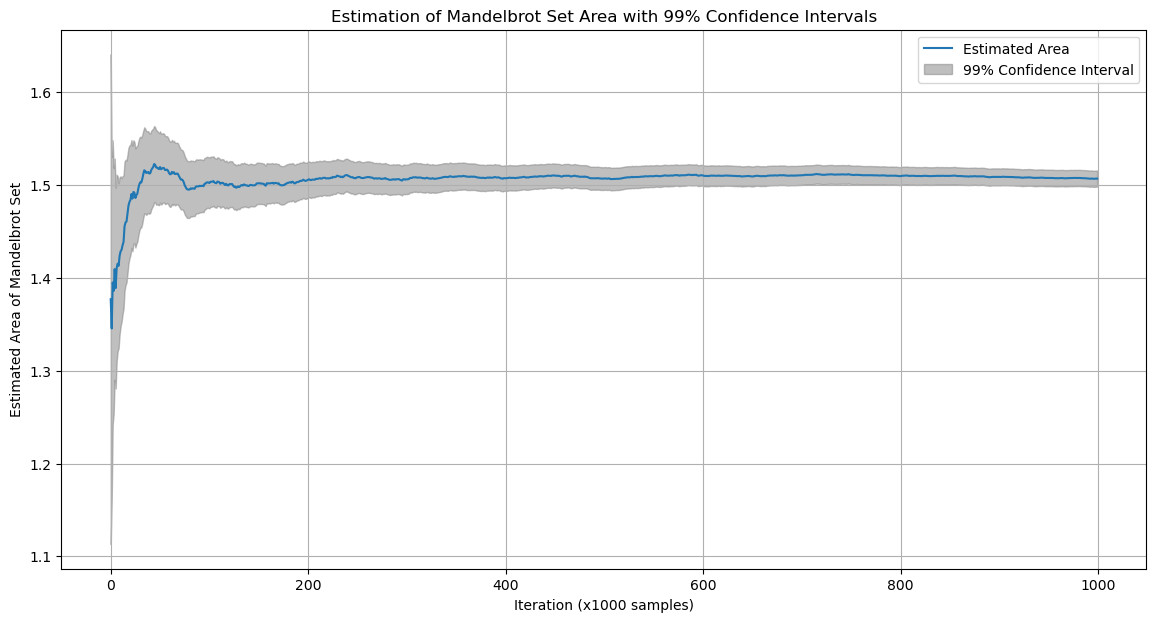

In [18]:
import numpy as np
from matplotlib import pyplot as plt

# Mandelbrot迭代函数
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

# 计算Mandelbrot集合面积的函数
def estimate_mandelbrot_area(x_range, y_range, max_iter, samples, confidence):
    # 计算整个区域的面积
    total_area = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
    
    # 初始化样本点计数器
    in_mandelbrot_count = 0
    
    # 存储每一步的面积估计值和置信区间长度
    areas = []
    interval_lengths = []
    relative_errors = []
    for _ in range(0, samples, 1000):
        # 生成随机点
        real = np.random.uniform(x_range[0], x_range[1], 1000)
        imag = np.random.uniform(y_range[0], y_range[1], 1000)
        complex_numbers = real + imag * 1j
        
        # 判断这些点是否在Mandelbrot集合中
        for c in complex_numbers:
            if mandelbrot(c, max_iter) == max_iter:
                in_mandelbrot_count += 1
        
        # 计算置信区间
        p_hat = in_mandelbrot_count / (1000 * (_ // 1000 + 1))
        z_score = 2.576  # 99% confidence level
        margin_of_error = z_score * np.sqrt((p_hat * (1 - p_hat)) / (1000 * (_ // 1000 + 1)))
        
        # 计算置信区间的边界和长度
        lower_bound = p_hat - margin_of_error
        upper_bound = p_hat + margin_of_error
        interval_length = upper_bound - lower_bound
        relative_error = interval_length / 2 / p_hat
        # 记录结果
        areas.append(p_hat * total_area)
        interval_lengths.append(interval_length * total_area)
        relative_errors.append(relative_error)
        
    return areas, interval_lengths, relative_errors

# 设定参数
x_range = [-2, 1]
y_range = [-1.5, 1.5]
max_iter = 2000
samples = 1000000  # 总样本数
confidence = 0.99

# 运行函数
areas, interval_lengths, relative_errors = estimate_mandelbrot_area(x_range, y_range, max_iter, samples, confidence)

# 输出结果
for i in range(len(areas)):
    print(f"Step {i+1}, Area: {areas[i]}, CI Length: {interval_lengths[i]}, relative_errors:{relative_errors[i]}")

# 绘图展示
plt.figure(figsize=(14, 7))
plt.plot(areas, label='Estimated Area')
plt.fill_between(range(len(areas)), 
                 [a - l/2 for a, l in zip(areas, interval_lengths)], 
                 [a + l/2 for a, l in zip(areas, interval_lengths)], 
                 color='gray', alpha=0.5, label='99% Confidence Interval')
plt.xlabel('Iteration (x1000 samples)')
plt.ylabel('Estimated Area of Mandelbrot Set')
plt.title('Estimation of Mandelbrot Set Area with 99% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


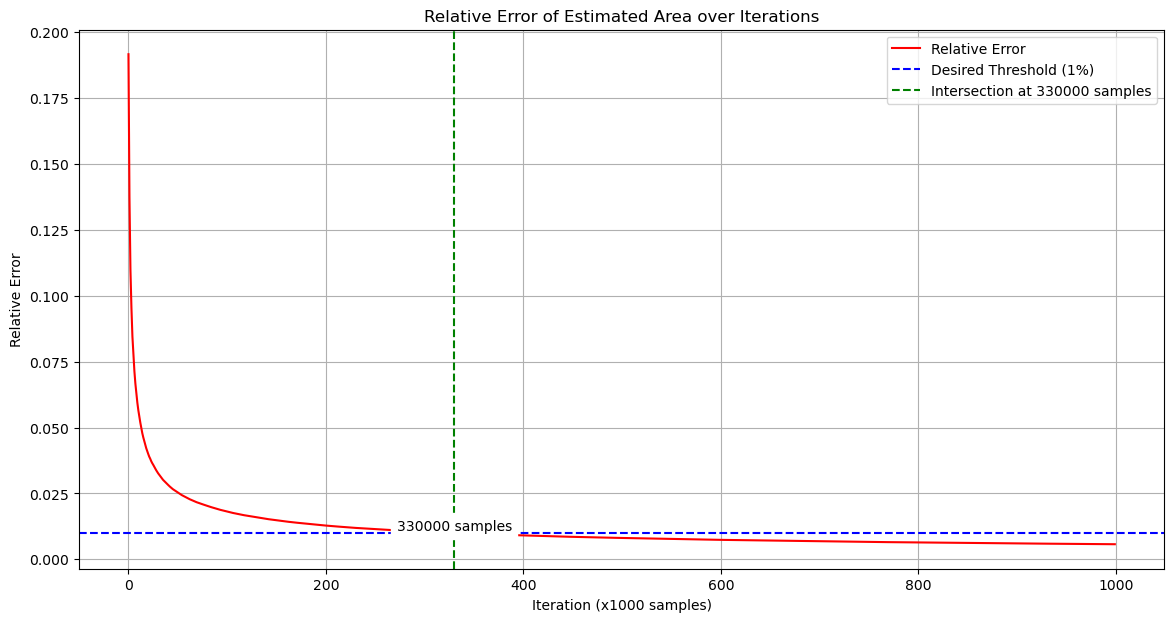

In [24]:
# 绘制相对误差图
plt.figure(figsize=(14, 7))
plt.plot(relative_errors, label='Relative Error', color='red')
threshold_line = 0.01
plt.axhline(y=threshold_line, color='blue', linestyle='--', label='Desired Threshold (1%)')

# 查找交点
intersection_x = next(x[0] for x in enumerate(relative_errors) if x[1] <= threshold_line)
plt.axvline(x=intersection_x, color='green', linestyle='--', label=f'Intersection at {intersection_x * 1000} samples')

# 标注交点的x坐标
plt.text(intersection_x, threshold_line, f'{intersection_x * 1000} samples', va='bottom', ha='center', backgroundcolor='white')

plt.xlabel('Iteration (x1000 samples)')
plt.ylabel('Relative Error')
plt.title('Relative Error of Estimated Area over Iterations')
plt.legend()
plt.grid(True)
plt.show()




因此我们确定了i=2000,s=330000，使用i = 10000以及s = 1000000的均匀分布去估计真值Am

Q3 differ sampling